### Data Loading

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
df = pd.read_csv(r"C:\Users\nnina\Documents\BioLab_C\Current_experiments_C\2024.08.19_LIV-Actin_Tubulin_results\afilament\agg_stat\cell_stat.csv")



In [57]:
def assign_treatment(row):
    if 'CNT' in row['Image_name']:
        return 'Control'
    elif 'LIV' in row['Image_name']:
        return 'LIV'
    else:
        return None

df['Treatment'] = df.apply(assign_treatment, axis=1)

In [58]:
remove_df = pd.read_excel(r"C:\Users\nnina\Documents\BioLab_C\Current_experiments_C\2024.08.19_LIV-Actin_Tubulin_results\afilament\cells_to_remove.xlsx")
remove_df

,Img_name,Cell_num,Reason,Can be reanalized
0,LSM-CNT_Plate4-04(3)_img-num_22_max_projection,0,edge,True
1,LSM-CNT_Plate4-04(5)_img-num_44_max_projection,1,not cell,False
2,LSM-CNT_Plate4-04(6)_img-num_54_max_projection,0,edge,True
3,LSM-CNT_Plate4-04(6)_img-num_54_max_projection,1,edge,True
4,LSM-CNT_Plate4-04(7)_img-num_55_max_projection,0,edge,True
5,LSM-CNT_Plate4-04(7)_img-num_55_max_projection,1,bad cell,False
6,LSM-CNT_Plate4-04(12)_img-num_3_max_projection,0,edge,True
7,LSM-CNT_Plate4-04(14)_img-num_5_max_projection,0,bad cell,False
8,LSM-CNT_Plate4-04(22)_img-num_14_max_projection,1,bad cell,False
9,LSM-CNT_Plate4-04(26)_img-num_18_max_projection,2,edge,True


In [59]:
remove_df['Base_name'] = remove_df['Img_name'].str.split('_img-num').str[0]
df['Base_name'] = df['Image_name'].str.split('.czi').str[0]
df

,Image_name,Img_num,Cell_num,"Nucleus_volume, cubic_micrometre","Nucleus_length, micrometre","Nucleus_width, micrometre","Nucleus_high, micrometre",Nucleus_total_intensity,Total_fiber_num,Cap_fiber_num,...,Fiber_intensity_cap,Fiber_intensity_bottom,F-actin_signal_intensity_whole,F-actin_signal_intensity_cap,F-actin_signal_intensity_bottom,"Branching_nodes_total, #","Branching_nodes_cap, #","Branching_nodes_bottom, #",Treatment,Base_name
0,LSM-CNT_Plate4-04(1).czi,0,0,2045.887322,23.981865,22.190449,8.75,2215430344,149,78,...,563861597,85062846,4057990791,1992813819,2065134916,69,57,18,Control,LSM-CNT_Plate4-04(1)
1,LSM-CNT_Plate4-04(1).czi,0,1,1083.533286,21.728148,16.873987,6.25,1001824421,70,31,...,192624155,298100168,2229099268,918687225,1310095709,20,6,9,Control,LSM-CNT_Plate4-04(1)
2,LSM-CNT_Plate4-04(1).czi,0,2,1813.811281,23.230626,24.848679,6.25,2098660442,126,88,...,830387768,248807186,4595661349,2539445720,2056519517,60,59,10,Control,LSM-CNT_Plate4-04(1)
3,LSM-CNT_Plate4-04(10).czi,1,0,1642.930760,20.283457,17.509651,8.50,2364907958,137,63,...,272924843,128001559,2841225323,1234386607,1601746597,53,37,13,Control,LSM-CNT_Plate4-04(10)
4,LSM-CNT_Plate4-04(19).czi,10,0,2118.512806,24.270803,23.403989,7.75,1646500148,152,99,...,1656868247,106366307,8143134202,4560004482,3581922295,99,83,5,Control,LSM-CNT_Plate4-04(19)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,LSM-LIV_Plate3-01(45).czi,96,0,2909.665737,26.293370,19.936731,10.00,4715623745,122,60,...,28738056,19411316,2357652979,1090846012,1267409905,6,2,7,LIV,LSM-LIV_Plate3-01(45)
208,LSM-LIV_Plate3-01(45).czi,96,1,2741.975605,25.831069,22.074873,9.75,3669213312,180,79,...,121940016,37158483,2923254620,1251052120,1671849877,12,8,3,LIV,LSM-LIV_Plate3-01(45)
209,LSM-LIV_Plate3-01(46).czi,97,0,2717.079470,27.795848,21.092484,9.00,4388236863,92,42,...,145421146,142069418,3510704728,1425194152,2085498943,22,14,12,LIV,LSM-LIV_Plate3-01(46)
210,LSM-LIV_Plate3-01(47).czi,98,0,6054.729810,34.210275,30.511867,9.75,7452690025,178,52,...,97962280,192036713,4937118427,1820375173,2983468403,34,4,26,LIV,LSM-LIV_Plate3-01(47)


In [60]:
df = df[(~df['Base_name'].isin(remove_df['Base_name'])) & (df['Cell_num'].isin(remove_df['Cell_num']))]
df.columns

Index(['Image_name', 'Img_num', 'Cell_num', 'Nucleus_volume, cubic_micrometre',
       'Nucleus_length, micrometre', 'Nucleus_width, micrometre',
       'Nucleus_high, micrometre', 'Nucleus_total_intensity',
       'Total_fiber_num', 'Cap_fiber_num', 'Bottom_fiber_num',
       'Total_fiber_volume, cubic_micrometre',
       'Cap_fiber_volume, cubic_micrometre',
       'Bottom_fiber_volume, cubic_micrometre',
       'Total_fiber_length, micrometre', 'Cap_fiber_length, micrometre',
       'Bottom_fiber_length, micrometre', 'Fiber_intensity_whole',
       'Fiber_intensity_cap', 'Fiber_intensity_bottom',
       'F-actin_signal_intensity_whole', 'F-actin_signal_intensity_cap',
       'F-actin_signal_intensity_bottom', 'Branching_nodes_total, #',
       'Branching_nodes_cap, #', 'Branching_nodes_bottom, #', 'Treatment',
       'Base_name'],
      dtype='object')

In [61]:
df = df.drop(columns=['Base_name'])
#Save df as csv
df.to_csv(r"C:\Users\nnina\Documents\BioLab_C\Current_experiments_C\2024.08.19_LIV-Actin_Tubulin_results\afilament\agg_stat\cell_stat_cleaned.csv", index=False)


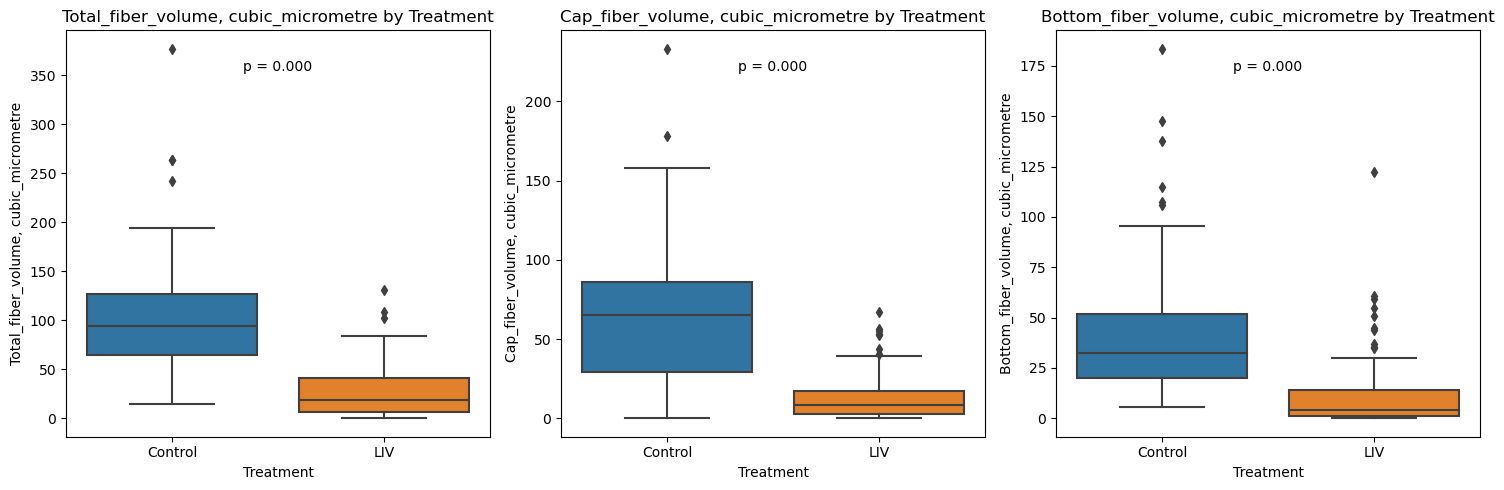

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Define the columns to plot
cols_to_plot = ['Total_fiber_volume, cubic_micrometre', 'Cap_fiber_volume, cubic_micrometre', 'Bottom_fiber_volume, cubic_micrometre']

# Create a figure and axes for subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Loop over the columns to plot
for i, col in enumerate(cols_to_plot):
    # Separate data for the two treatments
    control_data = df[df['Treatment'] == 'Control'][col]
    liv_data = df[df['Treatment'] == 'LIV'][col]

    # Perform t-test
    t_stat, p_val = ttest_ind(control_data, liv_data)

    # Create boxplot on the subplot
    sns.boxplot(x='Treatment', y=col, data=df, ax=axs[i])
    axs[i].set_title(f'{col} by Treatment')

    # Add p-value to the plot
    axs[i].text(0.5, 0.9, f'p = {p_val:.3f}', transform=axs[i].transAxes, ha='center')

plt.tight_layout()
plt.show()


In [63]:
df = pd.read_csv(r"C:\Users\nnina\Documents\BioLab_C\Current_experiments_C\2024.08.19_LIV-Actin_Tubulin_results\afilament\agg_stat\cell_stat_cleaned.csv")
df

,Image_name,Img_num,Cell_num,"Nucleus_volume, cubic_micrometre","Nucleus_length, micrometre","Nucleus_width, micrometre","Nucleus_high, micrometre",Nucleus_total_intensity,Total_fiber_num,Cap_fiber_num,...,Fiber_intensity_whole,Fiber_intensity_cap,Fiber_intensity_bottom,F-actin_signal_intensity_whole,F-actin_signal_intensity_cap,F-actin_signal_intensity_bottom,"Branching_nodes_total, #","Branching_nodes_cap, #","Branching_nodes_bottom, #",Treatment
0,LSM-CNT_Plate4-04(1).czi,0,0,2045.887322,23.981865,22.190449,8.75,2215430344,149,78,...,644408232,563861597,85062846,4057990791,1992813819,2065134916,69,57,18,Control
1,LSM-CNT_Plate4-04(1).czi,0,1,1083.533286,21.728148,16.873987,6.25,1001824421,70,31,...,494082731,192624155,298100168,2229099268,918687225,1310095709,20,6,9,Control
2,LSM-CNT_Plate4-04(1).czi,0,2,1813.811281,23.230626,24.848679,6.25,2098660442,126,88,...,881145227,830387768,248807186,4595661349,2539445720,2056519517,60,59,10,Control
3,LSM-CNT_Plate4-04(10).czi,1,0,1642.930760,20.283457,17.509651,8.50,2364907958,137,63,...,414242035,272924843,128001559,2841225323,1234386607,1601746597,53,37,13,Control
4,LSM-CNT_Plate4-04(19).czi,10,0,2118.512806,24.270803,23.403989,7.75,1646500148,152,99,...,1799736112,1656868247,106366307,8143134202,4560004482,3581922295,99,83,5,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,LSM-LIV_Plate3-01(45).czi,96,0,2909.665737,26.293370,19.936731,10.00,4715623745,122,60,...,47765671,28738056,19411316,2357652979,1090846012,1267409905,6,2,7,LIV
147,LSM-LIV_Plate3-01(45).czi,96,1,2741.975605,25.831069,22.074873,9.75,3669213312,180,79,...,160293376,121940016,37158483,2923254620,1251052120,1671849877,12,8,3,LIV
148,LSM-LIV_Plate3-01(46).czi,97,0,2717.079470,27.795848,21.092484,9.00,4388236863,92,42,...,289540153,145421146,142069418,3510704728,1425194152,2085498943,22,14,12,LIV
149,LSM-LIV_Plate3-01(47).czi,98,0,6054.729810,34.210275,30.511867,9.75,7452690025,178,52,...,312123632,97962280,192036713,4937118427,1820375173,2983468403,34,4,26,LIV


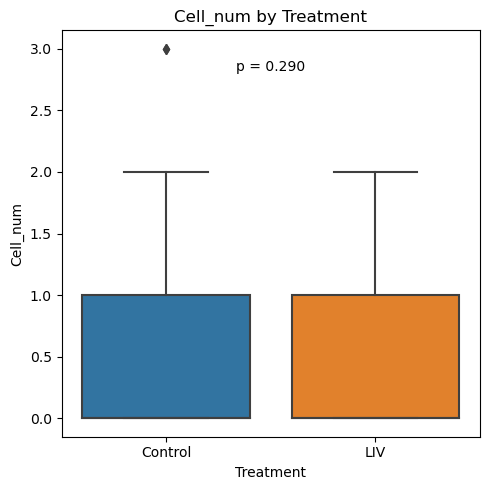

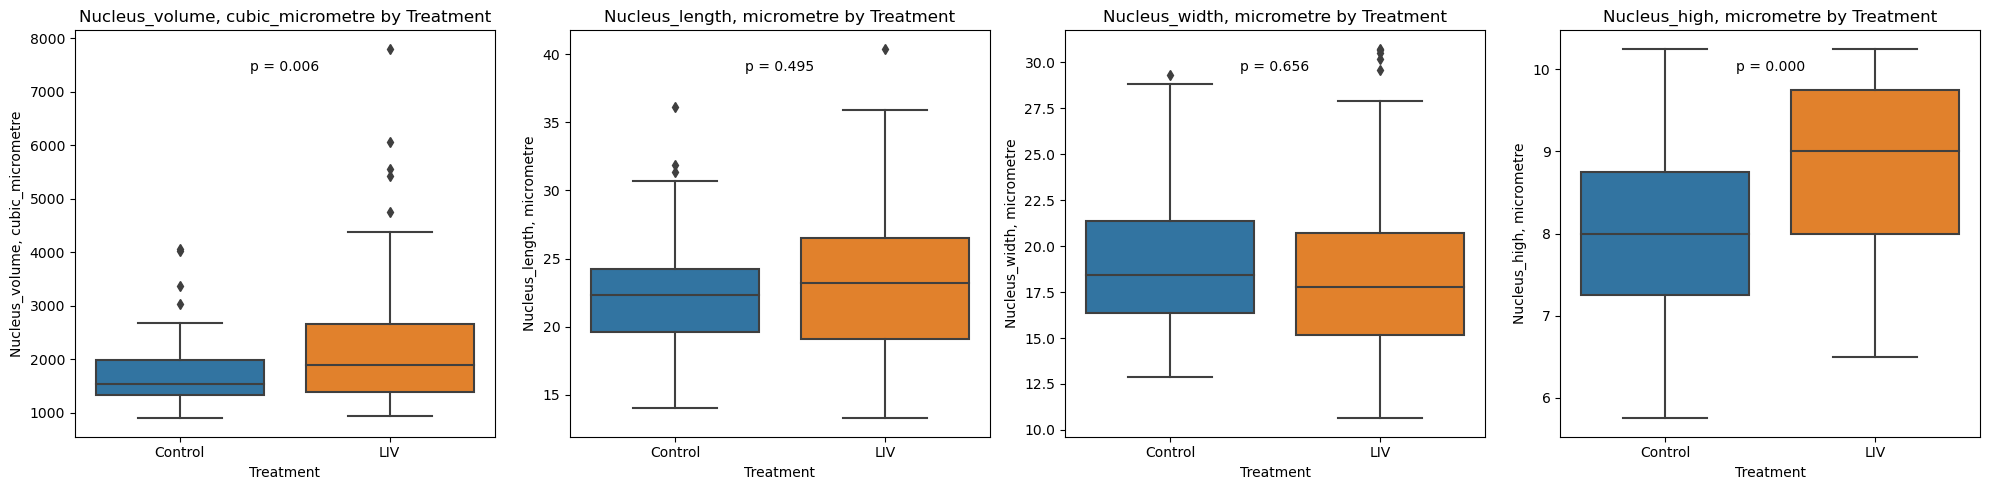

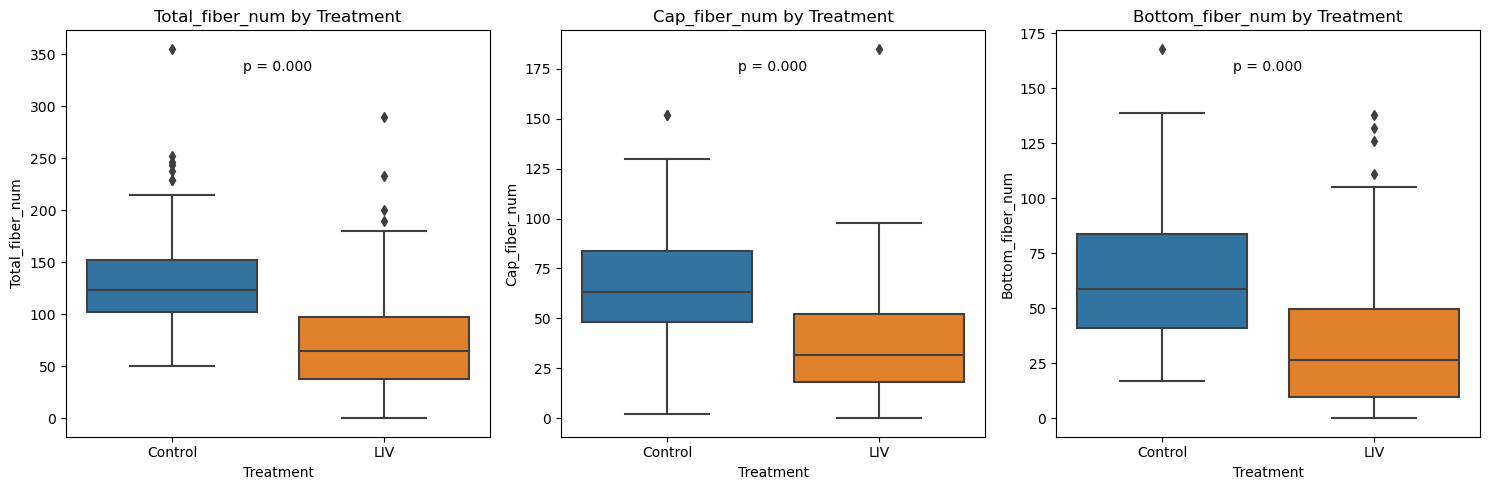

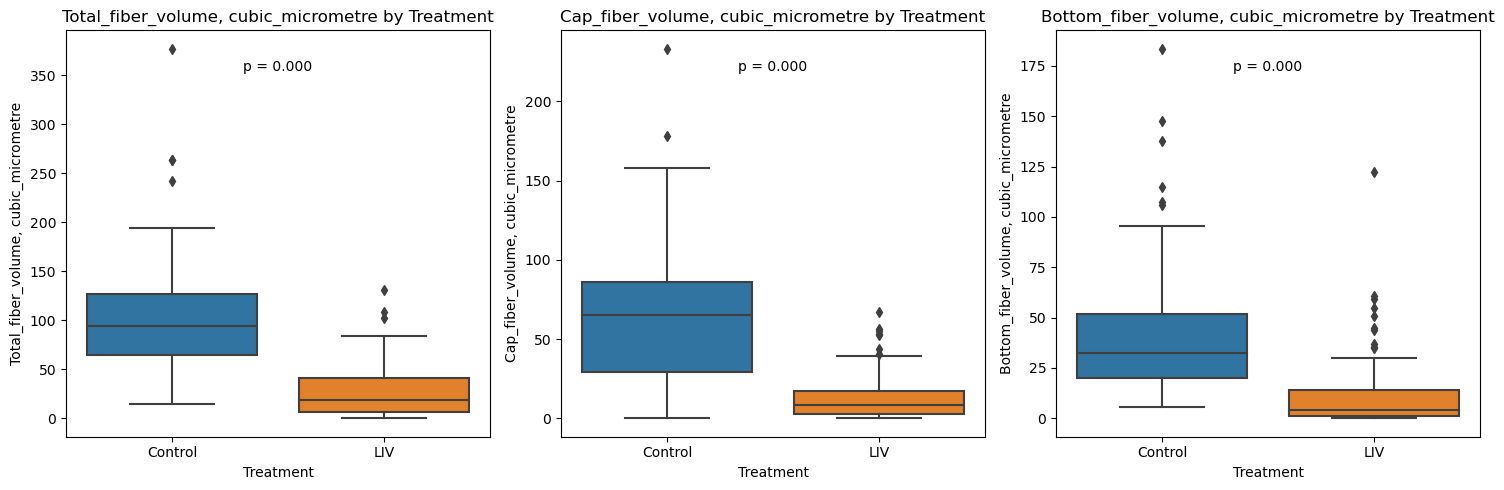

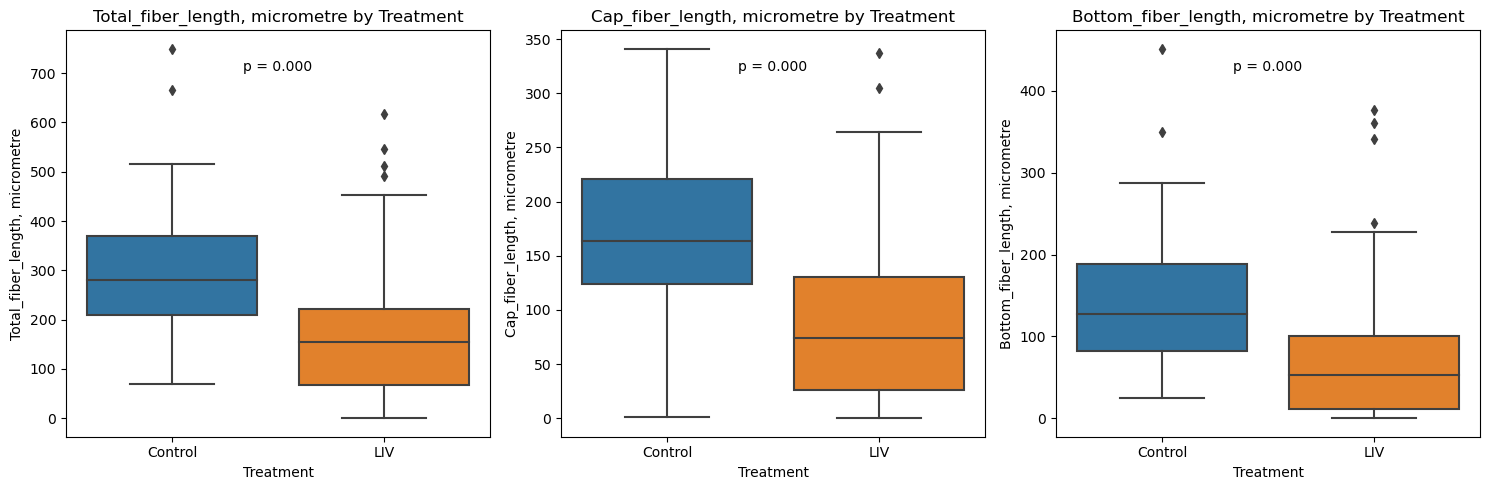

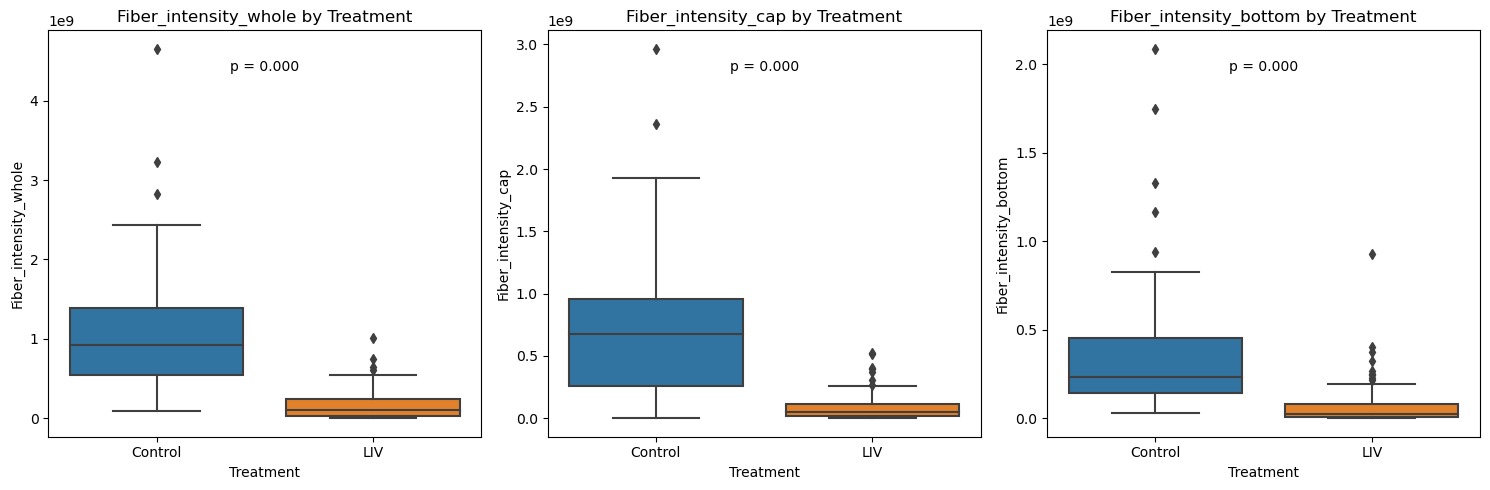

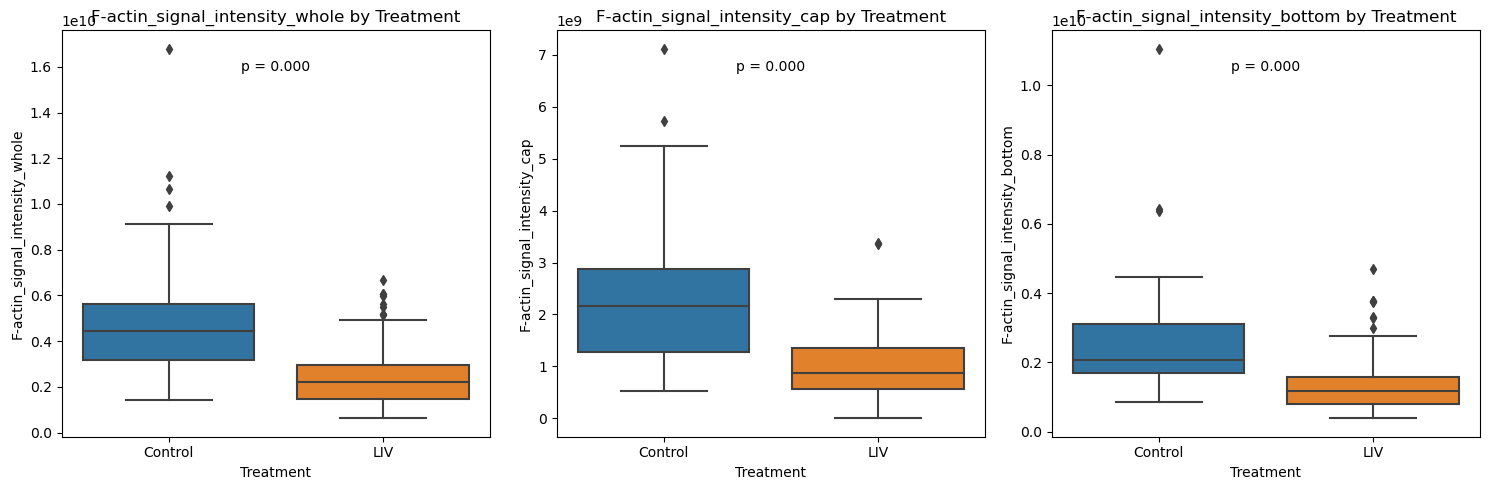

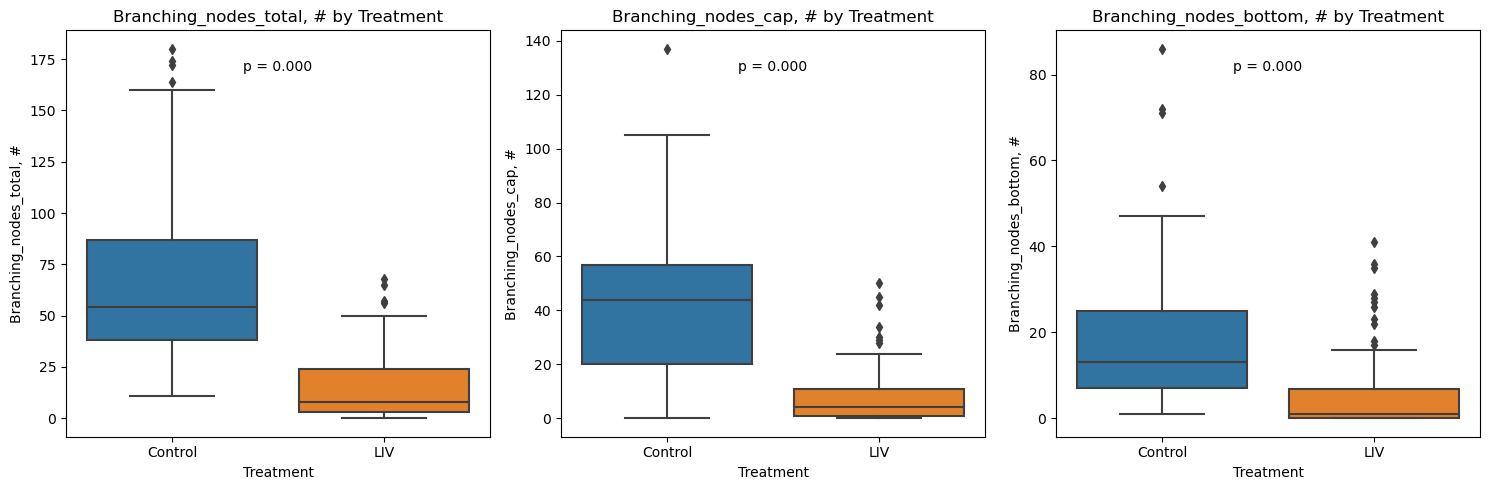

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Define the rows to plot
rows_to_plot = [
    ['Cell_num'],
    ['Nucleus_volume, cubic_micrometre', 'Nucleus_length, micrometre', 'Nucleus_width, micrometre', 'Nucleus_high, micrometre'],
    ['Total_fiber_num', 'Cap_fiber_num', 'Bottom_fiber_num'],
    ['Total_fiber_volume, cubic_micrometre', 'Cap_fiber_volume, cubic_micrometre', 'Bottom_fiber_volume, cubic_micrometre'],
    ['Total_fiber_length, micrometre', 'Cap_fiber_length, micrometre', 'Bottom_fiber_length, micrometre'],
    ['Fiber_intensity_whole', 'Fiber_intensity_cap', 'Fiber_intensity_bottom'],
    ['F-actin_signal_intensity_whole', 'F-actin_signal_intensity_cap', 'F-actin_signal_intensity_bottom'],
    ['Branching_nodes_total, #', 'Branching_nodes_cap, #', 'Branching_nodes_bottom, #']
]

# Loop over the rows to plot
for row in rows_to_plot:
    # Create a figure and axes for subplots
    fig, axs = plt.subplots(1, len(row), figsize=(5*len(row), 5))

    # If there's only one subplot, axs is not a list
    if len(row) == 1:
        axs = [axs]

    # Loop over the columns to plot
    for i, col in enumerate(row):
        # Separate data for the two treatments
        control_data = df[df['Treatment'] == 'Control'][col]
        liv_data = df[df['Treatment'] == 'LIV'][col]

        # Perform t-test
        t_stat, p_val = ttest_ind(control_data, liv_data)

        # Create boxplot on the subplot
        sns.boxplot(x='Treatment', y=col, data=df, ax=axs[i])
        axs[i].set_title(f'{col} by Treatment')

        # Add p-value to the plot
        axs[i].text(0.5, 0.9, f'p = {p_val:.3f}', transform=axs[i].transAxes, ha='center')

    plt.tight_layout()
    plt.show()

In [65]:
# count Control in df and LIV in df
df['Treatment'].value_counts()


LIV        94
Control    57
Name: Treatment, dtype: int64